<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBOOST-最佳" data-toc-modified-id="XGBOOST-最佳-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>XGBOOST 最佳</a></span></li><li><span><a href="#n_estimator" data-toc-modified-id="n_estimator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>n_estimator</a></span></li><li><span><a href="#30-" data-toc-modified-id="30--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>30-</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train_modified.csv')
test=pd.read_csv('test_modified.csv')

In [3]:
test_ID=test[['Item_Identifier','Outlet_Identifier']]
train_ID=train[['Item_Identifier','Outlet_Identifier']]

In [4]:
test=test.drop(['Item_Identifier','Outlet_Identifier'],1)
train=train.drop(['Item_Identifier','Outlet_Identifier'],1)

In [5]:
X=train.drop('Item_Outlet_Sales',1)
y=train.Item_Outlet_Sales
from sklearn.model_selection import train_test_split
#import LogisticReression and accuracy_score from sklearn and fit the lofistic regression model
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [6]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(x_cv)
    model_mae = mae(y_cv, model_pred)
    
    # Return the performance metric
    return model_mae

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 857.2215


In [8]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 808.5536


In [9]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 826.7566


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 784.4336


In [7]:
from xgboost import XGBRegressor
Xgboost= XGBRegressor(random_state=60)
Xgboost_mae = fit_and_evaluate(Xgboost)

print('XGBRegressor Performance on the test set: MAE = %0.4f' % Xgboost_mae)

[01:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Performance on the test set: MAE = 758.5100


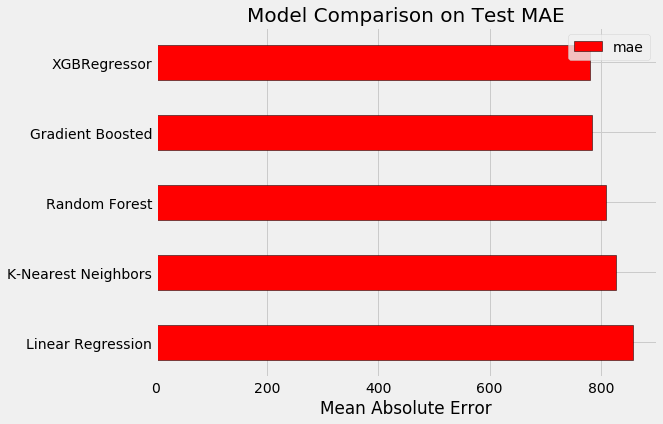

In [12]:
from IPython.core.pylabtools import figsize

plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBRegressor'],
                                 'mae': [lr_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae,Xgboost_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

# XGBOOST 最佳

In [9]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
Xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
# 设置参数
n_estimators = [50, 100, 250]
max_depth = [5, 10]
min_child_weight = [1, 3, 6]
learning_rate = [0.1, 0.2, 0.3]


# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_child_weight': min_child_weight,
                       'learning_rate': learning_rate}

In [12]:
# Create the model to use for hyperparameter tuning
model= XGBRegressor(random_state = 60)

# Set up the random search with 4-fold cross validation
random_cv_xgboost = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=60)

In [13]:
# Fit on the training data
random_cv_xgboost.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.7min finished


[23:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=60, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [14]:
random_model=random_cv_xgboost.best_estimator_
random_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [15]:
random_model_pred=random_model.predict(x_cv)
print('RandomSearc model performance on the test set:   MAE = %0.4f.' % mae(y_cv, random_model_pred))

RandomSearc model performance on the test set:   MAE = 680.8172.


# n_estimator

In [10]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100,200,300,400]}

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [11]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   38.7s finished


[01:56:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=3, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=60,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

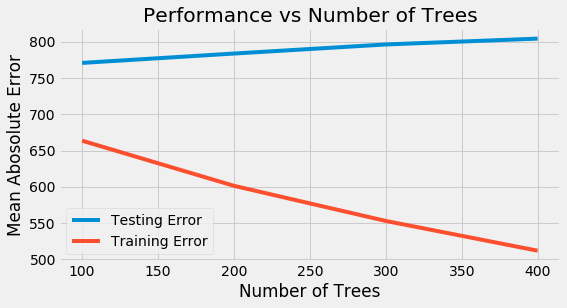

In [12]:
from IPython.core.pylabtools import figsize
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 4)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# 30-

In [25]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [10,15,20,25,30]}

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [26]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.3s finished


[23:15:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=3, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=60,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 15, 20, 25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

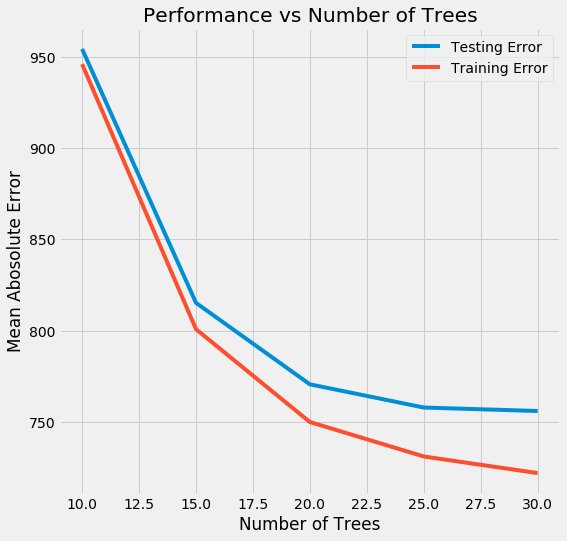

In [27]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [28]:
model_30tree=grid_search.best_estimator_
model_30tree

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [29]:
thirtytree_pred=model_30tree.predict(x_cv)
print('thirtytree_pred model performance on the test set:   MAE = %0.4f.' % mae(y_cv, thirtytree_pred))

thirtytree_pred model performance on the test set:   MAE = 723.8820.


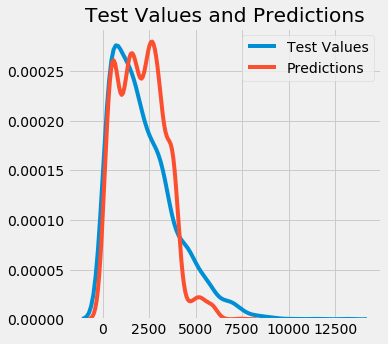

In [38]:
figsize(5, 5)

# Density plot of the final predictions and the test values
sns.kdeplot(y_cv, label = 'Test Values')
sns.kdeplot(thirtytree_pred, label = 'Predictions')

# Label the plot
plt.title('Test Values and Predictions');

In [34]:
#Export submission file:
#Dcol.append(target)
#submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
#submission.to_csv(filename, index=False)

test_predition=model_30tree.predict(test)

submission=test_ID
submission['Outlet_Sales']=test_predition
#pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Outlet_Sales']).to_csv('Submission.csv')

In [37]:
submission.to_csv('Submission.csv')
submission

,Item_Identifier,Outlet_Identifier,Outlet_Sales
0,FDW58,OUT049,1582.776978
1,FDW14,OUT017,1311.205811
2,NCN55,OUT010,635.027954
3,FDQ58,OUT017,2334.428223
4,FDY38,OUT027,5863.675293
...,...,...,...
5676,FDB58,OUT046,2096.730713
5677,FDD47,OUT018,2476.915771
5678,NCO17,OUT045,1833.626343
5679,FDJ26,OUT017,3367.093994


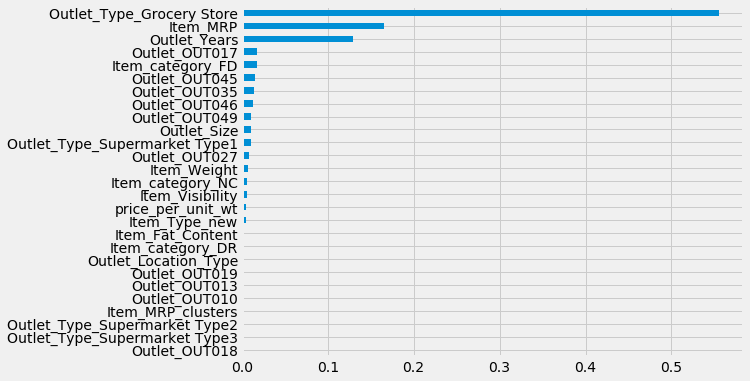

In [54]:
importances=pd.Series(model_30tree.feature_importances_, index=X.columns).sort_values(ascending=True) 
importances.plot(kind='barh', figsize=(8,6))

In [47]:
from sklearn import metrics
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_cv, thirtytree_pred)))

RMSE : 1058


In [52]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1=model_30tree
coef2 = pd.Series(alg1.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

AttributeError: Coefficients are not defined for Booster type gbtree

In [ ]:
# Ridge Regression Model:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')